EVALUATION ON BENCHMARK DATASET

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv("../evaluation/results/eval_2410.14077v2.csv")
df.head()



,query_id,question,pred_answer,gt_answer,gt_doc_id,gt_section_id,latency_s,num_citations,hit_doc,query_type,query_source,cited_sources
0,d639debd-b486-4fd2-a555-45f39a35cedf,How does discarding q-axis dynamics affect noi...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Discarding q-axis dynamics improves noise reje...,2410.14077v2,9,3.06,0,False,abstractive,text-table-image,NaN
1,852703f0-8373-43a2-a18a-eb5908ad0779,What are the challenges in estimating output i...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Estimating output impedance in inverter-based ...,2410.14077v2,1,2.06,0,False,abstractive,text-image,NaN
2,54794ee1-92d1-4e56-865a-224dda2788ae,Is the inverter connected to a grid with a vol...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Yes.,2410.14077v2,7,2.06,0,False,extractive,text,NaN
3,87856189-29a8-4104-a8e1-c0af6a849833,How do existing methods like signal injection ...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Existing methods like signal injection often f...,2410.14077v2,1,2.06,0,False,abstractive,text-image,NaN
4,3bdbc190-4695-4fc4-9255-41ed3ba45ce5,Does a low-bandwidth PLL improve inductance es...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,"Yes, a low-bandwidth PLL results in much lower...",2410.14077v2,9,2.05,0,False,extractive,text-table-image,NaN


In [36]:
display_cols = [
    "query_id",
    "question",
    "pred_answer",
    "gt_answer",
    "latency_s",
    "num_citations"
]

df[display_cols]


,query_id,question,pred_answer,gt_answer,latency_s,num_citations
0,d639debd-b486-4fd2-a555-45f39a35cedf,How does discarding q-axis dynamics affect noi...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Discarding q-axis dynamics improves noise reje...,3.06,0
1,852703f0-8373-43a2-a18a-eb5908ad0779,What are the challenges in estimating output i...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Estimating output impedance in inverter-based ...,2.06,0
2,54794ee1-92d1-4e56-865a-224dda2788ae,Is the inverter connected to a grid with a vol...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Yes.,2.06,0
3,87856189-29a8-4104-a8e1-c0af6a849833,How do existing methods like signal injection ...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Existing methods like signal injection often f...,2.06,0
4,3bdbc190-4695-4fc4-9255-41ed3ba45ce5,Does a low-bandwidth PLL improve inductance es...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,"Yes, a low-bandwidth PLL results in much lower...",2.05,0
5,8f2f108d-8edf-4111-81aa-8dc5bf8211a2,Does the VDF-RLS algorithm maintain stable res...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,"Yes, the VDF-RLS algorithm maintains stable re...",2.07,0
6,aa895a0e-1ba6-4d08-924a-7729247ed24d,How do different estimation algorithms perform...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,"Under no-excitation conditions, the VDF-RLS al...",2.07,0
7,2d25d3ca-2ecb-44c1-adc9-e090bb187824,What is the purpose of using a variable direct...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,The variable direction forgetting recursive-le...,2.08,0
8,ad04523d-ab6c-414d-9c58-5ed28d2fbe86,How does transforming measurements into the dq...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,Transforming measurements into the dq coordina...,2.07,0
9,ddf9dfa2-8a4b-4bee-89a1-5578336eb5a8,How does the VDF-RLS algorithm maintain stabil...,Unknown session_id 6fff736c-e9e4-461a-a5bb-43f...,It maintains stability like the RLS algorithm ...,2.03,0


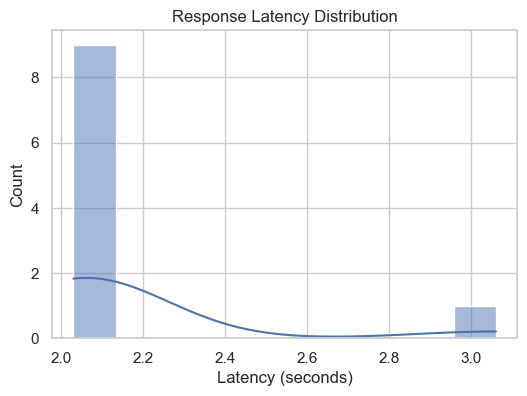

Mean latency: 2.161


In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df["latency_s"], bins=10, kde=True)
plt.title("Response Latency Distribution")
plt.xlabel("Latency (seconds)")
plt.ylabel("Count")
plt.show()

print("Mean latency:", df["latency_s"].mean())


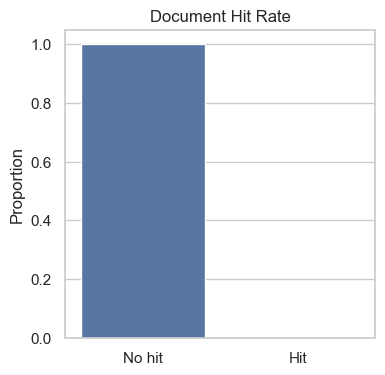

Hit rate: 0.00


In [38]:
hit_rate = df["hit_doc"].mean()

plt.figure(figsize=(4,4))
sns.barplot(x=["No hit", "Hit"], y=[
    1 - hit_rate,
    hit_rate
])
plt.title("Document Hit Rate")
plt.ylabel("Proportion")
plt.show()

print(f"Hit rate: {hit_rate:.2f}")


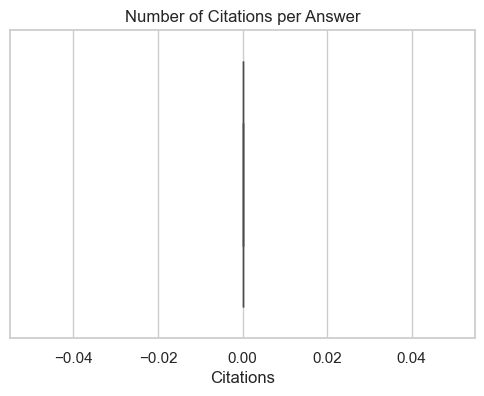

Average citations: 0.0


In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["num_citations"])
plt.title("Number of Citations per Answer")
plt.xlabel("Citations")
plt.show()

print("Average citations:", df["num_citations"].mean())


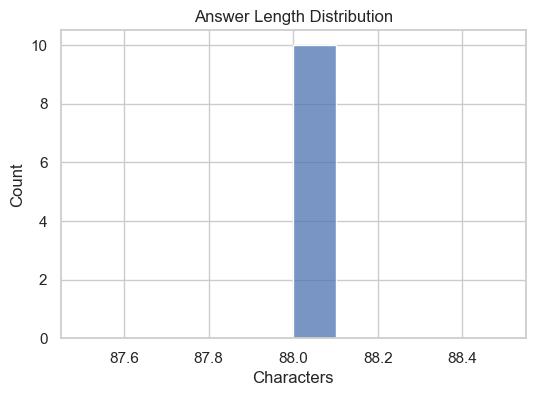

In [40]:
df["answer_length"] = df["pred_answer"].str.len()

plt.figure(figsize=(6,4))
sns.histplot(df["answer_length"], bins=10)
plt.title("Answer Length Distribution")
plt.xlabel("Characters")
plt.show()


In [41]:
df["has_citation"] = df["num_citations"] > 0

citation_precision = (
    df[df["has_citation"]]["hit_doc"].mean()
)

citation_precision


nan

In [42]:
df["answer_length"] = df["pred_answer"].str.len()

empty_rate = (df["answer_length"] < 50).mean()
empty_rate


0.0

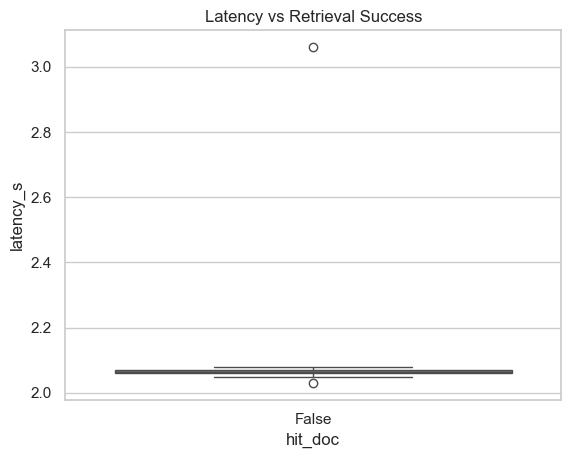

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="hit_doc", y="latency_s")
plt.title("Latency vs Retrieval Success")
plt.show()


In [44]:
summary = {
    "Hit@Doc": hit_at_doc,
    "Citation Precision": citation_precision,
    "Empty Answer Rate": empty_rate,
    "Avg Latency (s)": df["latency_s"].mean(),
    "Avg #Citations": df["num_citations"].mean(),
}

pd.DataFrame.from_dict(summary, orient="index", columns=["value"])


,value
Hit@Doc,0.000
Citation Precision,NaN
Empty Answer Rate,0.000
Avg Latency (s),2.161
Avg #Citations,0.000
